# **Boosting Techniques Assignment**
---

## Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Answer:** **Definition of Boosting:**
Boosting is an **ensemble learning technique** in machine learning that combines multiple **weak learners** to create a **strong learner**. A weak learner is a model that performs slightly better than random guessing (e.g., a shallow decision tree). Boosting works **sequentially**, where each new model focuses on correcting the errors made by the previous models.

**How Boosting Works:**
The process of boosting can be explained in steps:

1. **Train a weak learner** on the training data.
2. **Evaluate errors**: Identify which samples were misclassified by this model.
3. **Assign higher weights** to the misclassified samples so that the next learner focuses more on these difficult cases.
4. **Train the next weak learner** using the updated weights.
5. **Combine all learners**: After multiple iterations, the predictions of all weak learners are combined (usually weighted) to produce the final strong model.

Mathematically, in methods like **AdaBoost**:

* Each weak learner (h_t(x)) is assigned a weight (\alpha_t) based on its accuracy.
* The final prediction is:
  [
  H(x) = \text{sign} \Big(\sum_{t=1}^T \alpha_t h_t(x)\Big)
  ]

**How Boosting Improves Weak Learners:**

* **Focus on Hard Cases:** Each weak learner in the sequence pays more attention to the samples misclassified by previous learners.
* **Error Reduction:** By combining multiple weak models, the overall error decreases, producing a strong learner.
* **Weighted Voting:** Predictions are combined in a weighted manner so that more accurate learners contribute more to the final prediction.
* **Bias-Variance Reduction:** Boosting reduces **bias** by focusing on misclassified points and also can reduce **variance** as multiple models are combined.

**Popular Boosting Algorithms:**

1. **AdaBoost (Adaptive Boosting)** – Adjusts weights of misclassified samples.
2. **Gradient Boosting** – Builds models to predict the **residual errors** of previous models.
3. **XGBoost / LightGBM / CatBoost** – Advanced boosting methods used in competitions for higher speed and accuracy.

**Key Advantages of Boosting:**

* Converts weak learners into a strong learner.
* Works well on complex datasets.
* Can significantly improve prediction accuracy.

**Example:**
Imagine a class of students (weak learners) who each know a little about a subject. Individually, they may not perform well, but if each one focuses on what the others got wrong and then shares their knowledge, together they achieve excellent results.

**Summary:**
Boosting is a **sequential ensemble technique** that **improves weak learners** by focusing on their errors, weighting difficult samples, and combining multiple weak models into a **strong and accurate model**.

---

## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

**Answer:** **1. AdaBoost (Adaptive Boosting):**

* **Training Approach:** AdaBoost trains weak learners **sequentially**, **focusing on misclassified samples** from previous learners.
* **Weighting:** Each training sample is assigned a weight. Misclassified samples get **higher weights**, so the next learner focuses more on them.
* **Error Correction:** The algorithm reduces **classification errors** by adjusting sample weights.
* **Combination:** Each learner is given a weight in the final prediction based on its accuracy.

**Summary:** AdaBoost modifies **data weights** to improve the next learner.

**2. Gradient Boosting:**

* **Training Approach:** Gradient Boosting trains weak learners **sequentially**, but each new learner is trained to **predict the residual errors (gradients) of the previous model**.
* **Error Correction:** Instead of weighting samples, Gradient Boosting fits learners to the **errors made by the previous model** (residuals).
* **Optimization:** It uses **gradient descent** to minimize a **loss function** (e.g., mean squared error for regression).
* **Combination:** Predictions are combined **additively** to produce the final output.

**Summary:** Gradient Boosting modifies **predictions** to reduce the loss, rather than weighting data points.

### **Key Difference Table:**

| Feature            | AdaBoost                        | Gradient Boosting                   |
| ------------------ | ------------------------------- | ----------------------------------- |
| Focus              | Misclassified samples           | Residual errors of previous model   |
| Sample weighting   | Yes, adjusts weights of samples | No, uses gradients of loss function |
| Loss optimization  | Implicit (via error weighting)  | Explicit (via gradient descent)     |
| Common Use         | Classification                  | Regression & Classification         |
| Combination Method | Weighted vote                   | Additive prediction                 |


**Example Analogy:**

* AdaBoost → “Pay more attention to the mistakes.”
* Gradient Boosting → “Learn to fix the mistakes step by step.”

---

## **Question 3: How does regularization help in XGBoost?**

**Answer:** **Introduction to XGBoost Regularization:**
XGBoost (Extreme Gradient Boosting) is an advanced boosting algorithm that includes **regularization techniques** to prevent **overfitting**. Regularization in XGBoost helps the model **generalize better** to unseen data by **penalizing complexity** in the trees.

**How Regularization Works in XGBoost:**

XGBoost adds a **regularization term** to the loss function:

[
\text{Objective} = \text{Loss (training error)} + \text{Regularization term (model complexity)}
]

* The **loss function** measures how well the model fits the data (e.g., mean squared error).
* The **regularization term** penalizes complex trees by considering:

  * **Number of leaves in a tree ((T))**
  * **Leaf weights ((w))**
  * **L1 (Lasso) and L2 (Ridge) penalties**

[
\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum w_j^2
]
Where:

* ( \gamma ) → penalty for each leaf (controls tree depth)
* ( \lambda ) → L2 regularization on leaf weights (controls overfitting)

**Benefits of Regularization in XGBoost:**

1. **Reduces Overfitting:**

   * Prevents trees from becoming too deep or complex.
   * Avoids memorizing training data, improving **generalization**.

2. **Controls Model Complexity:**

   * Encourages simpler trees that are more robust to noise.

3. **Improves Prediction Accuracy:**

   * By balancing **fit vs. complexity**, the model performs better on unseen data.

4. **Supports Sparse Data Handling:**

   * L1 regularization can effectively ignore irrelevant features.


**Intuitive Analogy:**
Imagine trying to memorize answers for an exam:

* Without regularization → you memorize every detail (overfit)
* With regularization → you learn the **important patterns only**, ignoring noise (better generalization)

**Summary:**
Regularization in XGBoost **penalizes overly complex trees** through L1/L2 penalties and leaf penalties, which **reduces overfitting, improves generalization, and makes the model more accurate**.

---

## Question 4: Why is CatBoost considered efficient for handling categorical data?

**Answer:** **Introduction to CatBoost:**
CatBoost is a **gradient boosting algorithm** specifically designed to handle **categorical features** efficiently. Unlike other boosting algorithms (like XGBoost or LightGBM), CatBoost can process categorical data **without the need for extensive preprocessing** like one-hot encoding.

**How CatBoost Handles Categorical Data Efficiently:**

1. **Ordered Target Encoding (Permutation-driven):**

   * CatBoost converts categorical features into numbers using a technique called **“ordered target statistics”**.
   * It calculates the **mean target value** for each category but in a way that **prevents data leakage** by only using previous examples in the permutation.
   * This ensures the model **does not overfit** to the training data.

2. **No One-Hot Encoding Needed:**

   * Traditional algorithms require converting categorical variables into one-hot vectors, which can **explode dimensionality** if there are many categories.
   * CatBoost works **directly with categorical data**, making it **memory-efficient and faster**.

3. **Combats Overfitting:**

   * CatBoost’s approach ensures **robust handling of high-cardinality features** (features with many unique values) without overfitting.

4. **Efficient and Fast Training:**

   * Its **symmetric tree structure** and efficient handling of categorical features allow **faster training** compared to other gradient boosting methods.

**Key Advantages:**

| Advantage                            | Explanation                                                 |
| ------------------------------------ | ----------------------------------------------------------- |
| Handles Categorical Data Directly    | No one-hot encoding needed, avoids high dimensionality      |
| Reduces Overfitting                  | Uses ordered target statistics to prevent data leakage      |
| Efficient Computation                | Faster training on large datasets                           |
| Works with High-Cardinality Features | Can handle features with many unique categories effectively |


**Intuitive Analogy:**
Imagine you have a list of cities as a feature. Instead of turning each city into a separate column (one-hot), CatBoost **assigns meaningful numbers based on past outcomes**, making the model smarter and faster.

**Answer Summary:**
CatBoost is efficient for categorical data because it **directly handles categories using ordered target encoding**, **avoids one-hot encoding**, **prevents overfitting**, and **enables faster, memory-efficient training**.

---

## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

**Answer:** **Introduction:**
Boosting and bagging are both ensemble methods, but they work differently:

* **Bagging** (e.g., Random Forest) reduces **variance** by averaging predictions of many independent models.
* **Boosting** (e.g., AdaBoost, Gradient Boosting, XGBoost, CatBoost) reduces **bias** by sequentially improving weak learners.

**Boosting is preferred when:**

* High predictive accuracy is required.
* Data has **complex patterns** that simple models struggle to capture.
* Avoiding underfitting is more important than overfitting (boosting can overfit if not regularized, but it often performs better than bagging).


**Real-World Applications of Boosting:**

| Application Area                                    | Why Boosting is Preferred                                                                                                                   |
| --------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Finance – Credit Scoring & Fraud Detection**      | Boosting focuses on difficult-to-predict cases, e.g., rare fraud transactions, improving accuracy in classification.                        |
| **Healthcare – Disease Prediction**                 | Boosting models like XGBoost can detect subtle patterns in patient data for predicting diseases (cancer, heart disease) with high accuracy. |
| **Marketing – Customer Churn Prediction**           | Sequential error correction allows boosting to predict which customers are likely to leave, even when patterns are complex.                 |
| **E-commerce – Recommendation Systems**             | Boosting captures intricate patterns in user behavior better than bagging models.                                                           |
| **Competitions – Kaggle & Data Science Challenges** | Boosting algorithms (XGBoost, CatBoost, LightGBM) consistently outperform bagging methods in predictive modeling contests.                  |
| **Natural Language Processing (NLP)**               | Text classification, sentiment analysis, and spam detection benefit from boosting’s focus on misclassified examples.                        |
| **Insurance – Risk Assessment**                     | Boosting captures nuanced patterns in claims data for better risk prediction.                                                               |


**Why Boosting Over Bagging in These Cases:**

* **High Bias Problem:** Boosting reduces bias effectively, while bagging mainly reduces variance.
* **Focus on Hard Cases:** Boosting gives more weight to misclassified samples, which is crucial in fraud detection, churn prediction, and rare disease prediction.
* **Better Accuracy:** Boosting often achieves higher predictive performance when the dataset has complex, non-linear relationships.

**Intuitive Analogy:**

* Bagging → “Ask 100 people independently and average their opinion.”
* Boosting → “Ask 1 person at a time, teach them from previous mistakes, and then combine their refined opinions.”

**Summary:**
Boosting techniques are preferred in **finance, healthcare, marketing, e-commerce, NLP, insurance, and competitive modeling** because they **focus on difficult-to-predict cases**, **reduce bias**, and **achieve higher accuracy** than bagging methods.

---

## Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
## Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

In [ ]:
import sklearn
print(sklearn.__version__)


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base estimator (MANDATORY in new versions)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost classifier
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))


## Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

In [ ]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)

# Print R-squared score
print("R-squared Score:", r2)


## Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# Grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# GridSearch
grid = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Train
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Output
print("Best Parameters:", grid.best_params_)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


## Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

In [ ]:
!pip install catboost


Model Accuracy: 0.9736842105263158


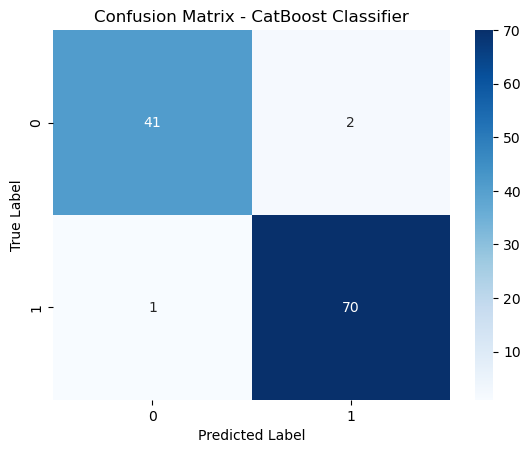

In [1]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=False
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


## Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)

### Answer:Step-by-Step Data Science Pipeline

**Use case:** Loan Default Prediction (Imbalanced + Missing + Mixed data)

## 1️.Data Preprocessing & Handling Issues

### Missing Values

* **Numeric features** → fill with **median** (robust to outliers)
* **Categorical features** → fill with **“Unknown”**
* Why? Keeps data size intact (important for imbalanced data)

### Categorical Variables

* **Best choice:** CatBoost

  * Handles categorical features **natively**
  * No need for One-Hot Encoding
* If using XGBoost → need encoding (OneHot / Target Encoding)

### Imbalanced Data

* Default cases are **minority class**
* Use:

  * `class_weight='balanced'` (CatBoost / AdaBoost)
  * OR `scale_pos_weight` (XGBoost)


## 2️.Choice of Boosting Algorithm (Most Important)

### **CatBoost (Best choice here)**

**Why?**

* Handles **missing values automatically**
* Handles **categorical features directly**
* Works very well on **imbalanced datasets**
* Minimal preprocessing → less error-prone

### AdaBoost

* Weak with noisy + missing data

###  XGBoost

* Very powerful, but:

  * Needs heavy preprocessing
  * Manual encoding required

**Final choice:** **CatBoost**

## 3️. Hyperparameter Tuning Strategy

Use **GridSearchCV** or **RandomizedSearchCV** to tune:

* `learning_rate` → controls step size
* `depth` → controls model complexity
* `iterations` → number of trees

Use **cross-validation (cv=5)** to avoid overfitting.

## 4️. Evaluation Metrics

Accuracy is  misleading (because data is imbalanced).

### Best metrics:

* **Recall** → catch maximum defaulters (business critical)
* **Precision** → avoid false alarms
* **F1-score** → balance between precision & recall
* **ROC-AUC** → overall discrimination power

**Most important for FinTech:**
**Recall + ROC-AUC**

## 5️. Business Benefits

*  Early identification of **high-risk customers**
*  Reduced **loan default losses**
*  Better **credit risk decisions**
*  Improved **profitability & trust**
*  Regulatory compliance support


In [3]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier

# Dummy loan default dataset (example)
data = pd.DataFrame({
    'age': [25, 45, None, 35, 50, 23, None, 60],
    'income': [50000, 80000, 30000, None, 90000, 40000, 70000, None],
    'gender': ['M', 'F', 'M', 'F', None, 'M', 'F', 'M'],
    'loan_default': [0, 1, 0, 1, 0, 0, 1, 0]
})

# Separate features & target
X = data.drop('loan_default', axis=1)
y = data['loan_default']

# Fill missing values (safe step)
X['age'].fillna(X['age'].median(), inplace=True)
X['income'].fillna(X['income'].median(), inplace=True)
X['gender'].fillna('Unknown', inplace=True)

# Categorical feature index (NOT name)
cat_features = [X.columns.get_loc('gender')]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    class_weights=[1, 3],
    verbose=False
)

# Train
model.fit(X_train, y_train, cat_features=cat_features)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


C:\Users\khush\AppData\Local\Temp\ipykernel_9060\4235087336.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\khush\AppData\Local\Temp\ipykernel_9060\4235087336.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC Score: 1.0
